<a href="https://colab.research.google.com/github/heath-barnett/chem3020/blob/main/Experimental_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental Data
When collecting data from a scientific instrument, a measurement is returned as a value or series of values, and these values are composed of both signal and noise. The signal is the component of interest while the noise is random instrument response resulting from a variety of sources that can include the instrument itself, the sample holder, and even the tiny vibrations of the building. For the most interpretable data, you want the largest signal-to-noise ratio possible in order to reliably identify the features in the data.

This lesson introduces the processing of experimental data including detecting features, removing noise from the data, and fitting the data to mathematical models. We will be using the NumPy library in this chapter and also start to use modules from the SciPy library. SciPy, short for “scientific python,” is one of the core libraries in the scientific Python ecosystem. This library includes a variety of modules for dealing with signal data, performing data transformations, and integrating sampled data among other common tasks in scientific data analysis.

# Loading and Working with Experimental Data - Pandas

**Pandas** is a popular open-source data manipulation and analysis library for the Python programming language. It provides easy-to-use data structures and functions to work with structured data, such as spreadsheets or SQL database tables. Here's a brief introduction to some key aspects of Pandas:

1. **Data Structures:** Pandas primarily offers two key data structures: Series and DataFrame.

   - **Series:** A one-dimensional labeled array capable of holding any data type. It's similar to a column in a spreadsheet or a single variable in statistics.
   - **DataFrame:** A two-dimensional table-like structure with rows and columns. It's the most commonly used Pandas object and can be thought of as similar to a spreadsheet or SQL table.

2. **Data Import/Export:** Pandas provides functions to read data from various file formats, including CSV, Excel, SQL databases, and more. You can also export data to these formats.

3. **Data Cleaning and Preprocessing:** You can easily clean and preprocess data with Pandas. This includes handling missing values, dropping unnecessary columns, and transforming data.

4. **Data Selection and Filtering:** Pandas offers powerful mechanisms for selecting and filtering data based on conditions, column names, and row indices.

5. **Data Aggregation and Grouping:** You can perform aggregation operations like sum, mean, count, etc., on data using Pandas. It also supports grouping data by one or more columns.

6. **Data Visualization:** Although not a primary data visualization library, Pandas can work seamlessly with popular visualization libraries like Matplotlib and Seaborn to create various plots and charts.

7. **Time Series Data:** Pandas has robust support for time series data, making it a preferred choice for working with time-stamped data.

8. **Integration with NumPy:** Pandas is built on top of the NumPy library, so it can efficiently handle numerical data and integrates well with NumPy arrays.

Pandas is an essential tool for data analysis and manipulation in Python, and it's widely used in data science, machine learning, and other fields where data handling and analysis are crucial.

All pandas functions are loaded into this notebook as  `pd.*` method. 

First we will load pandas, then read a csv with `pd.read_csv()` and then use a pandas to produce a scatter plot.

In [22]:
import pandas as pd
%matplotlib inline

raw_PV = pd.read_csv('data_PV.csv')
raw_PV

,90.0,0.9986524525621605
0,98.181818,0.754669
1,106.363636,0.795685
2,114.545455,0.643832
3,122.727273,0.706023
4,130.909091,0.636873
...,...,...
94,867.272727,0.103418
95,875.454545,0.102143
96,883.636364,0.100950
97,891.818182,0.100786


### Raw Data Can be Confusing
Our data is truncated to save space but it does tell us that we have 99 rows and 2 columns. However, we know that we have 100 measurements of Pressure and Volume data. The data that we loaded has 3 columns, the first column is an index (a unique id for every set of measurements that is automatically generated), then two columns that look like our pressure and volume data but it only shows 99 measurements instead of 100. The columns also appear to be labed with one our measurements (the missng row). We can correct this with the following line of code.

In [23]:
df_PV = pd.read_csv('data_PV.csv',names=['Pressure','Volume']) # the first column will now be called Pressure and the second column will be called Volume
df_PV

,Pressure,Volume
0,90.000000,0.998652
1,98.181818,0.754669
2,106.363636,0.795685
3,114.545455,0.643832
4,122.727273,0.706023
...,...,...
95,867.272727,0.103418
96,875.454545,0.102143
97,883.636364,0.100950
98,891.818182,0.100786


### Describe is a quick way to inspect your data.
`variable_name.describe()` will generate some quick information about your data. You have no control over the information it collects, this is just a quick convience script. For each column it will tell you the number items (count), average (mean), standard deviation (std), minimum (min), 3 percentiles at 25/50/75 and the maximum (max).

In [24]:
df_PV.describe()

,Pressure,Volume
count,100.000000,100.000000
mean,495.000000,0.249003
std,237.366753,0.177604
min,90.000000,0.098731
25%,292.500000,0.127120
50%,495.000000,0.179622
75%,697.500000,0.300024
max,900.000000,0.998652


### Selecting Specific Data
What if you just wanted the pressure data?

In [25]:
df_PV['Pressure']

0      90.000000
1      98.181818
2     106.363636
3     114.545455
4     122.727273
         ...    
95    867.272727
96    875.454545
97    883.636364
98    891.818182
99    900.000000
Name: Pressure, Length: 100, dtype: float64

What if you just want the first 15 Pressure and Volume data points?  

In [18]:
df_PV[0:14] # python is base-index 0 which means it starts counting from 0 not 1, the : means "between"

,Pressure,Volume
0,90.000000,0.998652
1,98.181818,0.754669
2,106.363636,0.795685
3,114.545455,0.643832
4,122.727273,0.706023
5,130.909091,0.636873
6,139.090909,0.535593
7,147.272727,0.601280
8,155.454545,0.557487
9,163.636364,0.523806


# Plotting Data with Pandas
Pandas is not designed for publication quality figures but it has some built-in plotting functions for convience (similar to SymPy).
Plotting data in Pandas is made easy with its integration with the Matplotlib library. Here's a step-by-step guide to plotting data in Pandas:

## **Basic Plotting**:
   You can quickly create basic plots directly from the DataFrame. For example, to create a line plot of a column:

   ```python
   df['column_name'].plot()
   ```

<AxesSubplot:>

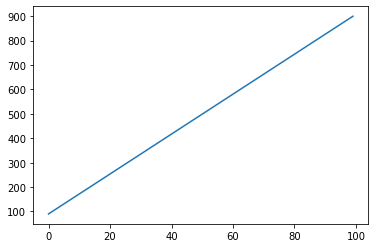

In [27]:
df_PV['Pressure'].plot() # please note that this just the pressure plotted against the index, it will look linear but thats just a coincidence it is not plotting things of interest.

## **Customizing Plots**:
   You can customize your plots using various parameters and methods:

   - Title, xlabel, and ylabel:
     ```python
     df['column_name'].plot(title='Title', xlabel='X-axis', ylabel='Y-axis')
     ```

   - Line style and color:
     ```python
     df['column_name'].plot(style='--', color='red')
     ```

   - Legends:
     ```python
     df.plot(x='x_column', y='y_column', label='Label 1')
     df.plot(x='x_column', y='y2_column', label='Label 2')
     plt.legend()
     ```

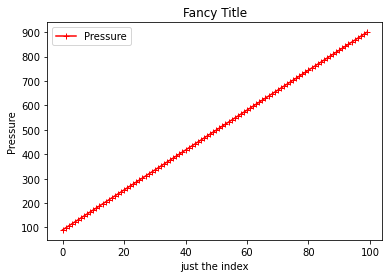

In [36]:
df_PV['Pressure'].plot(title = 'Fancy Title', xlabel = 'just the index', ylabel = 'Pressure', style='-+',color='red').legend()

## **Different Types of Plots**:

   - Scatter Plot:
     ```python
     df.plot.scatter(x='x_column', y='y_column')
     ```

   - Histogram:
     ```python
     df['column_name'].plot.hist()
     ```

   - Bar Plot:
     ```python
     df['column_name'].plot.bar()
     ```

   - Box Plot:
     ```python
     df.boxplot(column='column_name')
     ```

<AxesSubplot:xlabel='Pressure', ylabel='Volume'>

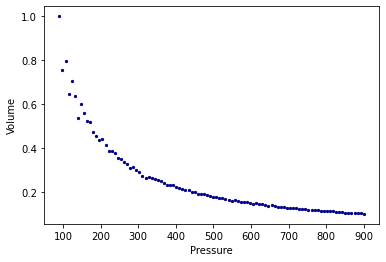

In [37]:
df_PV.plot.scatter(x='Pressure',y='Volume',marker='.', color ='DarkBlue') # Actual data!

<AxesSubplot:>

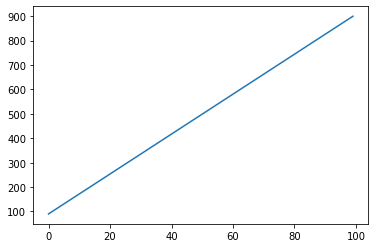

<AxesSubplot:xlabel='Pressure', ylabel='Volume'>

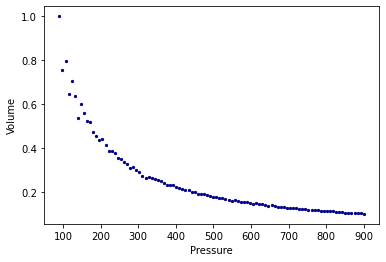

In [3]:
df_PV.plot.scatter(x='Pressure',y='Volume',marker='.', color ='DarkBlue')

## **Multiple Plots**:
   You can create subplots or multiple plots in a single figure.

   ```python
   fig, axes = plt.subplots(nrows=2, ncols=2)
   df['column1'].plot(ax=axes[0, 0])
   df['column2'].plot(ax=axes[0, 1])
   df['column3'].plot(ax=axes[1, 0])
   df['column4'].plot(ax=axes[1, 1])
   plt.show()
   ```

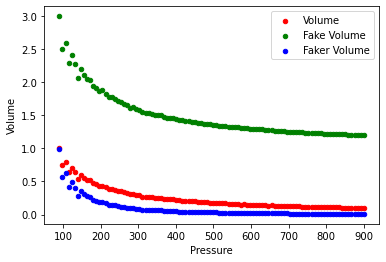

In [57]:
df_PV['V2'] = df_PV['Volume']*2+1 # just making some other data for plots
df_PV['V3'] = df_PV['Volume']**2 # just making some other data for plots

ax1 = df_PV.plot(kind='scatter', x='Pressure', y='Volume', color='r',label='Volume')    
ax2 = df_PV.plot(kind='scatter', x='Pressure', y='V2', color='g', ax=ax1,label='Fake Volume')    
ax3 = df_PV.plot(kind='scatter', x='Pressure', y='V3', color='b', ax=ax1,ylabel = 'Volume', label = 'Faker Volume')
ax1.legend()

## **Saving Plots**:
   You can save your plots as image files, such as PNG or JPEG. You can just copy/paste as well.

   ```python
   df['column_name'].plot()
   plt.savefig('plot.png')
   ```

# Linear (and Nonlinear) Regression

Probably all of you have fit a trendline through a set of data in Excel or another program:

$$
y = mx + b
$$ 

There are assumptions behind linear regression:

- **Linearity**: the relationship between X and Y is linear.
- **Independence**: observations are independent of each other (e.g., it's not a time series)
- **Homoscedasticity**: the residual errors do not depend on X
- **Normality**: the residual errors are normally distributed

It's fairly easy to use some diagnostic plots to test these assumptions, particularly:
- looking at the observed Y values versus the fitted values
- looking at the residual errors as a function of X values

We'll talk about the assumptions and what to do if they don't hold up later.

There are several packages in Python that can (and will) do curve fitting - each has somewhat different features, but for basic curve fitting it really doesn't matter which one you choose.

We're going to use `scipy.stats` for linear regression and `scipy.optimize` for general curve fitting.

# Loading SciPy
In contrast to SymPy and NumPy, each module from SciPy needs to be imported individually (too many in scipy to load all of them at one time), so import scipy is not going help you much. Instead, you need to do the following to import a module.

`from scipy import <specific module or function>`

In [61]:
from scipy import optimize, stats
import numpy as np
import matplotlib.pyplot as plt

Just in case we are going to reload our PV data and do a quick scatter plot to verify that it looks good.

<AxesSubplot:xlabel='Pressure', ylabel='Volume'>

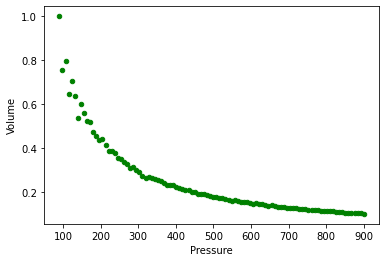

In [59]:
df_PV = pd.read_csv('data_PV.csv',names=['Pressure','Volume']) 
df_PV.plot.scatter(x='Pressure',y='Volume',marker='o', color ='Green')

We will next seperate our Pressure and Volume data to two seperate variables, this is not strictly neccessary but it makes things easier to work with later. We will then run `scipy.stats.linregress(X,Y)` to perform a linear regression on our Pressure and Volume data. The command produces several outputs, which we will assign to the variables: slope, intercept, r_value, p_value, std_err. This is not strictly neccessary either, we could just assign everything to one variable but again this is for ease later. Finally, we will plot what our fit looks like.

slope is -0.0006328992698288482
intercept is 0.5622885897262142
r-squared is 0.7154888132673878


Text(0, 0.5, 'Volume')

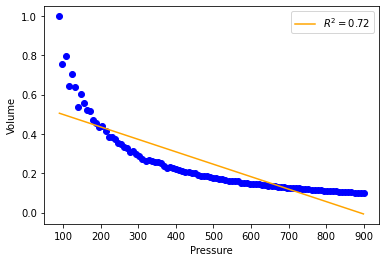

In [70]:
Pressure = df_PV['Pressure']
Volume = df_PV['Volume']

slope, intercept, r_value, p_value, std_err = stats.linregress(Pressure, Volume)
print('slope is', slope)
print('intercept is', intercept)
print('r-squared is', r_value**2)

plt.scatter(Pressure, Volume,color='blue')

line_x = np.arange(Pressure.min(), Pressure.max())
line_y = slope*line_x + intercept

plt.plot(line_x, line_y , color='orange',label='$R^2=%.2f$' % (r_value**2))
plt.legend(loc='best')
plt.xlabel('Pressure')
plt.ylabel('Volume')

# Did we do good?
No, no we didn't. Why?

slope is 82.0456128404786
intercept is 0.013022676347298978
r-squared is 0.989795227387516


Text(0, 0.5, 'Volume')

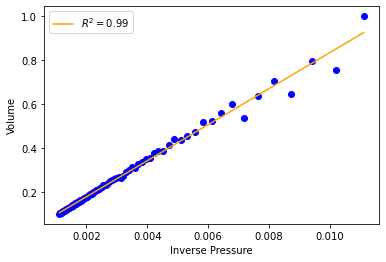

In [80]:
slope, intercept, r_value, p_value, std_err = stats.linregress(1/Pressure, Volume)
print('slope is', slope)
print('intercept is', intercept)
print('r-squared is', r_value**2)

plt.scatter(1/Pressure, Volume,color='blue')

line_x = np.arange(Pressure.min(), Pressure.max())
line_y = slope*(1/line_x) + intercept

plt.plot(1/line_x, line_y , color='orange',label='$R^2=%.2f$' % (r_value**2))
plt.legend(loc='best')
plt.xlabel('Inverse Pressure')
plt.ylabel('Volume')

# Non-linear Fitting (i.e. Curve Fitting)

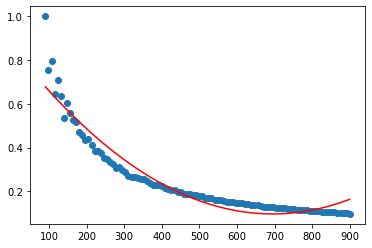

In [88]:
def model_P(x,a,b,c):
  return a*(x-b)**2+c

popt, pcov = optimize.curve_fit(model_P, Pressure, Volume, p0=[3,2,-16])

a_opt, b_opt, c_opt = popt
x_model = np.linspace(Pressure.min(), Pressure.max(), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt) 
 
plt.scatter(Pressure, Volume)
plt.plot(x_model, y_model, color='r')
plt.show()

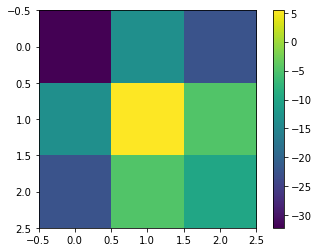

In [89]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()